In [31]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
!pip install ultralytics

In [33]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

In [34]:
results = model("/content/drive/MyDrive/CV/lab4/test1.jpg")

if results[0].boxes is not None:
    print("Найденные объекты:")
    for box in results[0].boxes:
        xyxy = box.xyxy[0]  # Координаты
        conf = box.conf[0]   # Уверенность
        cls = int(box.cls[0])  # Класс
        class_name = model.names[cls]  # Получаем имя класса
        print(f"Объект: {class_name}, координаты: ({xyxy[0]:.2f}, {xyxy[1]:.2f}), "
              f"({xyxy[2]:.2f}, {xyxy[3]:.2f}), уверенность: {conf:.2f}")


image 1/1 /content/drive/MyDrive/CV/lab4/test1.jpg: 448x640 1 car, 1 airplane, 12.5ms
Speed: 3.5ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Найденные объекты:
Объект: car, координаты: (160.54, 286.23), (710.39, 479.27), уверенность: 0.92
Объект: airplane, координаты: (0.17, 55.71), (391.05, 320.00), уверенность: 0.78


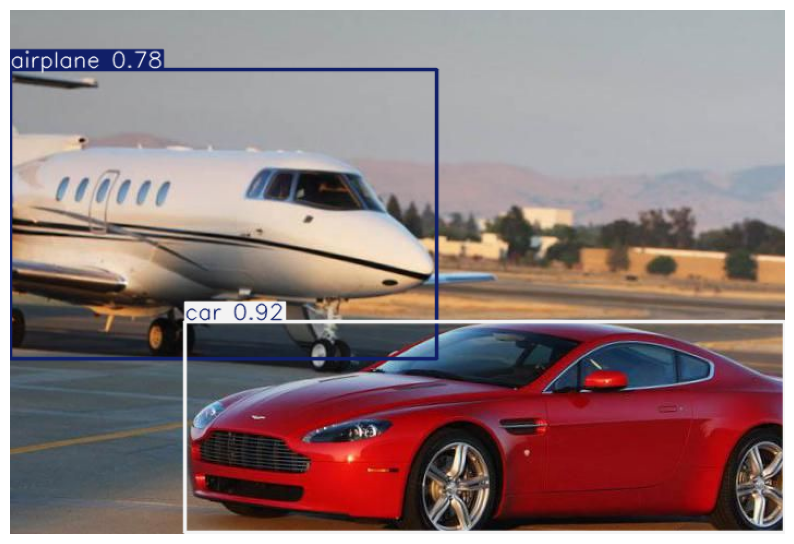

In [35]:
import matplotlib.pyplot as plt
import cv2
result_image = results[0].plot()
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')
plt.show()

In [36]:
!pip install roboflow

In [37]:
from roboflow import Roboflow
rf = Roboflow(api_key="cDDlCK1YnLioNbN366zV")
project = rf.workspace("myworkspace-capn7").project("lab4-hhlmo")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [38]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

# Train the model using the 'data.yaml' dataset for 15 epochs
results = model.train(data="/content/Lab4-1/data.yaml", epochs=20)

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Lab4-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

train: Scanning /content/Lab4-1/train/labels.cache... 414 images, 36 backgrounds, 0 corrupt: 100%|██████████| 414/414 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 439.1±334.6 MB/s, size: 57.5 KB)


val: Scanning /content/Lab4-1/valid/labels.cache... 38 images, 1 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.29G       1.51      2.485      1.709         73        640: 100%|██████████| 26/26 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         38         89    0.00781          1      0.301      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.45G       1.53      1.892      1.758         70        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         38         89      0.366       0.27      0.254      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.46G      1.529      1.773       1.73         96        640: 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         38         89      0.456      0.596      0.436        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.47G      1.567      1.732      1.731         74        640: 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         38         89      0.396      0.494       0.39      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.47G       1.49      1.609      1.678         85        640: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         38         89      0.684      0.652      0.611      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.49G      1.492        1.6      1.713         67        640: 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         38         89      0.624      0.539      0.625      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.5G      1.489      1.537       1.67         59        640: 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38         89      0.762      0.719       0.82      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.52G       1.42      1.482      1.655         53        640: 100%|██████████| 26/26 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         38         89       0.76      0.719      0.753      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.52G      1.361      1.403      1.578         69        640: 100%|██████████| 26/26 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         38         89      0.776      0.625      0.767      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.52G      1.388      1.407      1.634         66        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         38         89      0.783      0.708      0.744      0.436


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.53G      1.391      1.488       1.72         31        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38         89      0.861      0.697      0.809      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.55G      1.288      1.298      1.608         39        640: 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         38         89      0.859      0.753      0.858      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.56G       1.27      1.215      1.572         31        640: 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         38         89      0.861      0.763      0.839      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.56G      1.224      1.154      1.562         30        640: 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         38         89      0.852      0.798      0.873      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.56G      1.177      1.105      1.506         27        640: 100%|██████████| 26/26 [00:06<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         38         89      0.865      0.863      0.912      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.56G      1.148      1.047      1.488         42        640: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         38         89      0.894       0.82      0.907      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.56G       1.12     0.9886      1.469         27        640: 100%|██████████| 26/26 [00:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         38         89      0.925      0.865      0.904      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.56G      1.097     0.9653      1.453         42        640: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         38         89      0.894      0.853      0.901      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.56G       1.01     0.8918      1.373         34        640: 100%|██████████| 26/26 [00:06<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         38         89      0.911      0.854      0.911      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.56G      1.031     0.8801      1.402         35        640: 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         38         89      0.904      0.849      0.917      0.655



20 epochs completed in 0.049 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


                   all         38         89      0.904      0.849      0.917      0.653
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train6


In [39]:
train = "train6"

In [40]:
metrics = model.val()

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1698.7±429.4 MB/s, size: 67.0 KB)


val: Scanning /content/Lab4-1/valid/labels.cache... 38 images, 1 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]


                   all         38         89      0.904      0.849      0.917      0.653
Speed: 11.5ms preprocess, 7.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train62


In [41]:
import pandas as pd

val_prec = pd.read_csv(f'/content/runs/detect/{train}/results.csv')
val_prec.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,9.86038,1.50958,2.48546,1.70943,0.00781,1.00000,0.30064,0.14083,1.44963,2.78925,1.73518,0.000500,0.000500,0.000500
1,2,18.84290,1.53020,1.89237,1.75771,0.36552,0.26966,0.25423,0.10864,1.86175,2.47474,2.21362,0.000970,0.000970,0.000970
2,3,27.85990,1.52941,1.77261,1.72955,0.45634,0.59551,0.43606,0.20011,1.75940,2.10273,2.24796,0.001388,0.001388,0.001388
3,4,37.33910,1.56704,1.73210,1.73133,0.39630,0.49438,0.38991,0.19534,1.85307,2.94549,2.13475,0.001703,0.001703,0.001703
4,5,44.89470,1.48978,1.60868,1.67843,0.68363,0.65169,0.61111,0.32898,1.71127,2.44598,2.06156,0.001604,0.001604,0.001604


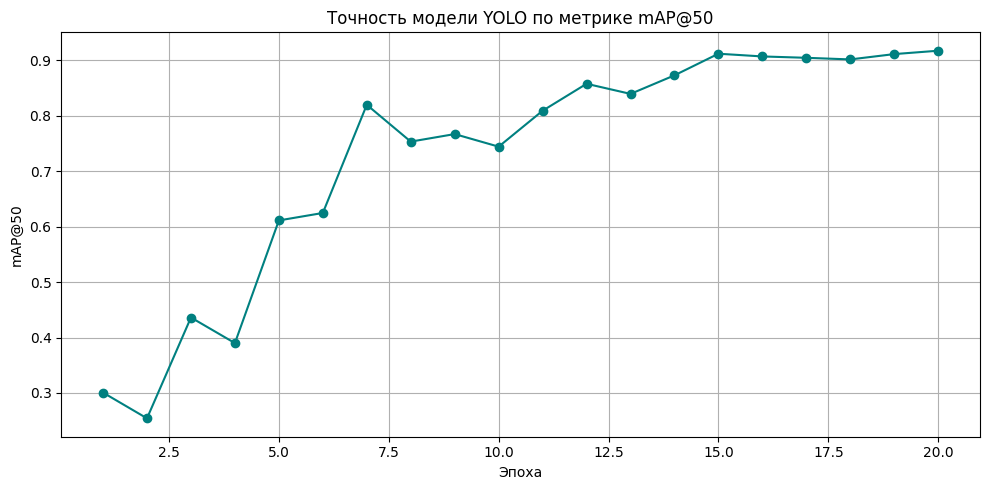

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(val_prec["epoch"], val_prec["metrics/mAP50(B)"], marker='o', color='teal')   # Строим график зависимости точности модели (mAP@50) от эпохи
plt.xlabel("Эпоха")
plt.ylabel("mAP@50")
plt.title("Точность модели YOLO по метрике mAP@50")
plt.grid(True)
plt.tight_layout()
plt.show()

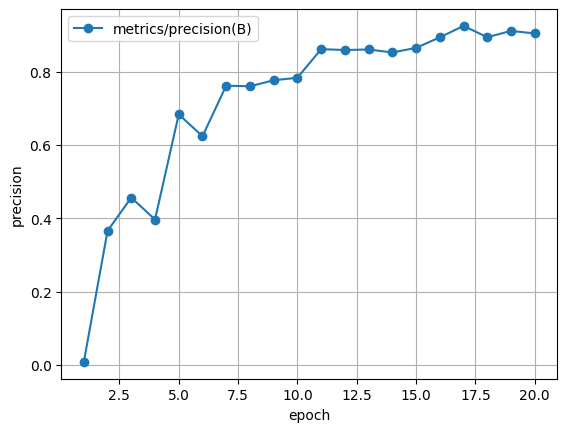

In [52]:
import matplotlib.pyplot as plt
val_prec.plot(x="epoch", y="metrics/precision(B)", marker='o')
plt.xlabel("epoch")
plt.grid(True)
plt.ylabel("precision")
plt.show()

In [44]:
from google.colab import files

files.download(f'/content/runs/detect/{train}/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
import cv2
import matplotlib.pyplot as plt
import os

model = YOLO(f'/content/runs/detect/{train}/weights/best.pt')

# Список изображений
dir = '/content/drive/MyDrive/CV/lab4/add_chickens'
images = os.listdir(dir)
images = [file for file in images if '.jpg' in file]

# Визуализация изображений
for img_name in images:
    results = model(f'{dir}/{img_name}')
    image = results[0].plot()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Используем matplotlib для отображения изображения
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.title(img_name)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.